# Handwritten digit recognition from MNIST dataset

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

Downloading train and test data from torchvision dataset

In [4]:
train = datasets.MNIST('', train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True,
                     transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


We will split the datasets into trainset and testset, we will pass 10 dataset in a batch and shuffle them to get of any kind of pattern

In [11]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

Visualizing data. Here we will see 10 data because the batch size of trainset is 10

In [32]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

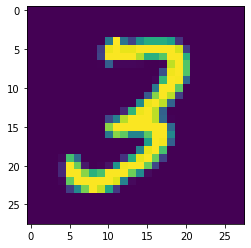

In [33]:
import matplotlib.pyplot as plt

X,y = data[0][1], data[1][0]
#print(X)
#print(y)
plt.imshow(X.view(28,28))
plt.show()

In [34]:
data[0][0][0][5]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

We can see that our data is already scaled. 
One other think to notice is that whether the data is balanced or not. Balanced data means the proportion of the features are close.

In [40]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)        

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


Essential imports for neural network implementation

In [41]:
import torch.nn as nn
import torch.nn.functional as F

To make our model we will create a class called 'Net' which will inherit from the nn.Module class. 'super().__init__()' is used to initialize the super class along with the current class.

This is a fully connected neural network. The first parameter of nn.Linear is the input size and the 2nd parameter is the output size.

In [47]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
